<a href="https://colab.research.google.com/github/RodrigoDSVDF/An-lise-de-Dados/blob/main/BTCArrima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import ccxt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Função para importar dados
def importar_dados():
    moeda = 'BTC/USDT'
    data = exchange.fetch_ohlcv(moeda, '1d')
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['moeda'] = moeda.split('/')[0]  # Extrair o código da moeda (BTC)
    return df

# Função para preparar dados
def preparar_dados(df):
    df.set_index('timestamp', inplace=True)
    df.index = pd.to_datetime(df.index, unit='ms')
    df_diario = df.groupby(['moeda', df.index.date])['close'].mean().reset_index()
    df_diario = df_diario.rename(columns={'timestamp': 'data'})
    return df_diario

# Conexão com a Binance

exchange = ccxt.binance({
    'apiKey': '',
    'secret': '',
    })

# Importar e preparar dados
df = importar_dados()
df_diario = preparar_dados(df)




In [ ]:
df.head()

,open,high,low,close,volume,moeda
timestamp,,,,,,
2022-08-18,23342.66,23600.00,23111.04,23191.20,144185.97011,BTC
2022-08-19,23191.45,23208.67,20783.57,20834.39,283995.87747,BTC
2022-08-20,20834.39,21382.85,20761.90,21140.07,183041.68363,BTC
2022-08-21,21140.07,21800.00,21069.11,21515.61,159200.68410,BTC
2022-08-22,21516.70,21548.71,20890.18,21399.83,222222.04526,BTC


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  500
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3926.929
Date:                Fri, 29 Dec 2023   AIC                           7861.859
Time:                        22:21:16   BIC                           7878.709
Sample:                             0   HQIC                          7868.471
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3650      0.417      0.875      0.381      -0.452       1.182
ar.L2          0.1034      0.047      2.186      0.029       0.011       0.196
ma.L1         -0.4608      0.419     -1.101      0.2

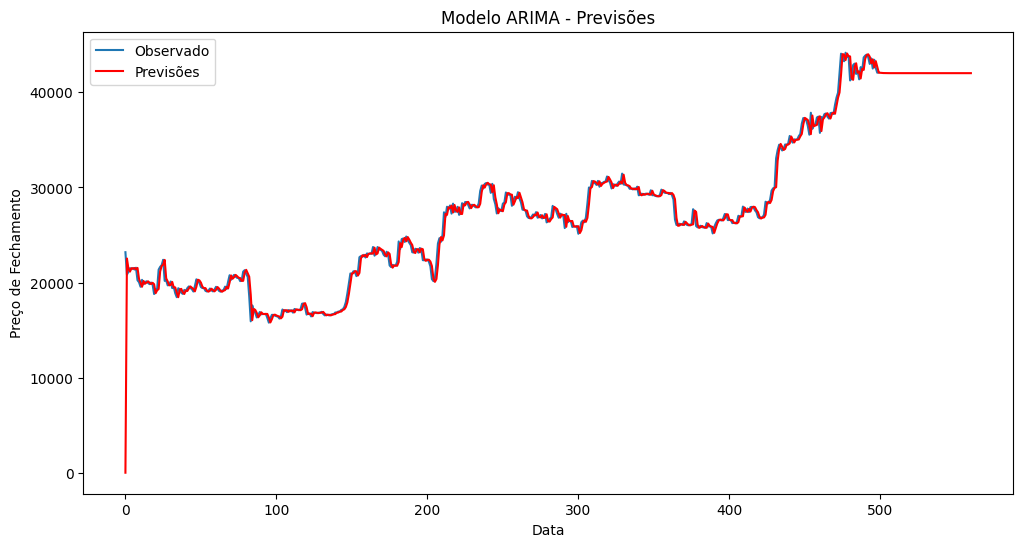

In [ ]:
# Ajustar o modelo ARIMA
p, d, q = 2, 1, 1 # Ajuste conforme necessário
modelo_arima = ARIMA(df_diario['close'], order=(p, d, q))
resultado_arima = modelo_arima.fit()

# Sumário do modelo
print(resultado_arima.summary())

# Previsões
previsoes = resultado_arima.predict(start=0, end=len(df_diario['close']) + 60)  # Ajuste conforme necessário

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(df_diario.index, df_diario['close'], label='Observado')
plt.plot(previsoes.index, previsoes, label='Previsões', color='red')
plt.title('Modelo ARIMA - Previsões')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Carregar os dados
df = importar_dados()

# Calcular o stock-to-flow
df['stock'] = df['close'].cumsum()
df['flow'] = df['close']
df['s2f'] = df['stock'] / df['flow']

# Construir o modelo de regressão
X = df['s2f'].values.reshape(-1,1)
y = df['close']
model = LinearRegression()
model.fit(X, y)

# Fazer uma previsão
s2f_novo = np.array([[100]])  # Substitua 100 pelo valor desejado de stock-to-flow
previsao = model.predict(s2f_novo)
print(f'A previsão do preço do Bitcoin para um S2F de 100 é: {previsao[0]}')


A previsão do preço do Bitcoin para um S2F de 100 é: 21553.66748447847


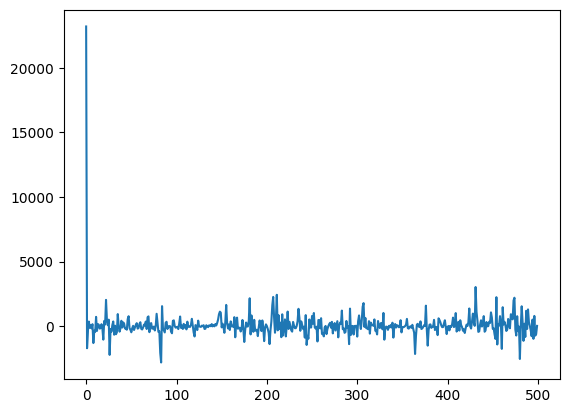

In [ ]:
residuos = resultado_arima.resid
residuos.plot()
plt.show()


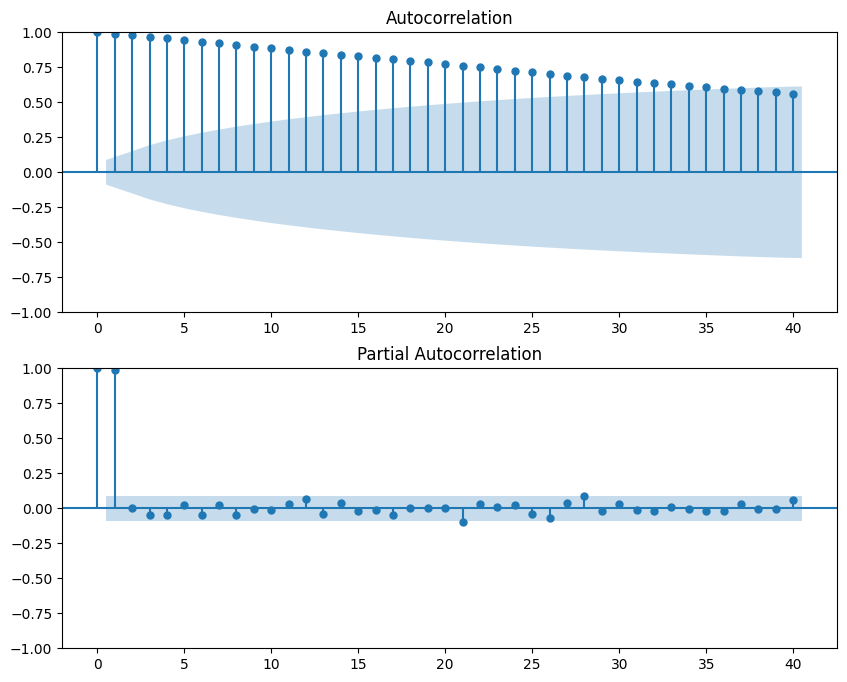

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot da ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_diario['close'], ax=ax1, lags=40)
plot_pacf(df_diario['close'], ax=ax2, lags=40)

plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
resultado_teste = adfuller(residuos)
print(f'p-valor: {resultado_teste[1]}')


p-valor: 0.0


In [ ]:
# Número de períodos para prever
n_períodos = 20

# Fazendo previsões
previsoes_futuras = resultado_arima.predict(start=len(df_diario), end=len(df_diario) + n_períodos)

# Imprimindo as previsões
print(previsoes_futuras)


500    42058.329225
501    42044.071623
502    42033.584905
503    42028.282962
504    42025.263415
505    42023.613050
506    42022.698442
507    42022.193959
508    42021.915251
509    42021.761358
510    42021.676368
511    42021.629434
512    42021.603515
513    42021.589202
514    42021.581297
515    42021.576932
516    42021.574521
517    42021.573190
518    42021.572455
519    42021.572049
520    42021.571825
Name: predicted_mean, dtype: float64


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 1. Ordenando o DataFrame pela coluna 'timestamp'
df_sorted = df.sort_values(by='timestamp', ascending=False)

# 2. Selecionando as últimas 10 linhas
ultimos_10_dias = df_sorted.head(30)

# Extraindo as colunas 'timestamp', 'close' e 'volume'
dados_ultimos_10_dias = ultimos_10_dias[['timestamp', 'close', 'volume']]

# Imprimindo os resultados em forma de tabela
print(dados_ultimos_10_dias.to_markdown(index=False))

| timestamp           |   close |   volume |
|:--------------------|--------:|---------:|
| 2023-12-30 00:00:00 | 42119   |  1182.22 |
| 2023-12-29 00:00:00 | 42066.9 | 42597.2  |
| 2023-12-28 00:00:00 | 42563.8 | 35150.5  |
| 2023-12-27 00:00:00 | 43428.8 | 36191.2  |
| 2023-12-26 00:00:00 | 42508.9 | 41010    |
| 2023-12-25 00:00:00 | 43576.1 | 27021.2  |
| 2023-12-24 00:00:00 | 42991.5 | 25144.3  |
| 2023-12-23 00:00:00 | 43702.2 | 16557.1  |
| 2023-12-22 00:00:00 | 43969   | 32783.2  |
| 2023-12-21 00:00:00 | 43861.8 | 34624.3  |
| 2023-12-20 00:00:00 | 43668.9 | 48710.3  |
| 2023-12-19 00:00:00 | 42276   | 40927.9  |
| 2023-12-18 00:00:00 | 42657.8 | 46734.1  |
| 2023-12-17 00:00:00 | 41374.7 | 27722.1  |
| 2023-12-16 00:00:00 | 42278   | 24118.9  |
| 2023-12-15 00:00:00 | 41940.3 | 33421.8  |
| 2023-12-14 00:00:00 | 43022.3 | 42047.1  |
| 2023-12-13 00:00:00 | 42869   | 45866    |
| 2023-12-12 00:00:00 | 41492.4 | 42722.7  |
| 2023-12-11 00:00:00 | 41253.4 | 76663.9  |
| 2023-12-

In [ ]:
exchange = ccxt.binance({
    'apiKey': 'i4QeU6dT1xo2kKQYDnw3tqr5VATR4DcdEt3l6dInrmM9pfv9IHPczv7CGDRPZDTi',
    'secret': 'Mt1LVBB2N8hTgFIKmG50uwGKUxIYgiejhwJr8ozHw5xvhMJDC6bu4kq6iIdS5943',
    })


In [ ]:
df = importar_dados()


In [ ]:
df.head()

,timestamp,open,high,low,close,volume,moeda
0,2022-08-17,23856.15,24446.71,23180.40,23342.66,210668.68766,BTC
1,2022-08-18,23342.66,23600.00,23111.04,23191.20,144185.97011,BTC
2,2022-08-19,23191.45,23208.67,20783.57,20834.39,283995.87747,BTC
3,2022-08-20,20834.39,21382.85,20761.90,21140.07,183041.68363,BTC
4,2022-08-21,21140.07,21800.00,21069.11,21515.61,159200.68410,BTC


In [ ]:
from pyramid.arima import auto_arima

# Construção do modelo
model = auto_arima(df['close'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df['close'])

# Resumo do modelo
print(model.summary())


ModuleNotFoundError: No module named 'pyramid'